In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

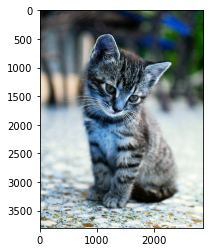

In [2]:
img = cv2.imread("img.png")
plt.imshow(img);

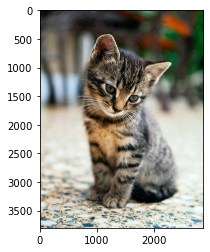

In [3]:
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

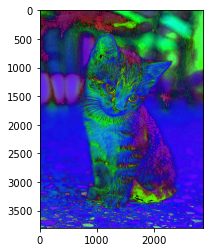

In [4]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

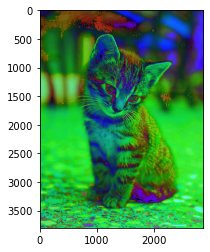

In [5]:
hls_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
plt.imshow(hls_img);

### Blending and Pasting Images

In [6]:
img1 = cv2.imread("img2.png")
img1 =cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("do-not-copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

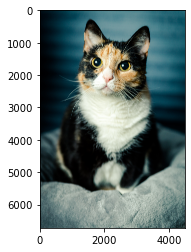

In [7]:
plt.imshow(img1);

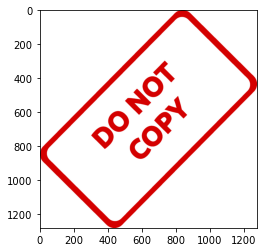

In [8]:
plt.imshow(img2);

In [9]:
img1.shape

(6720, 4480, 3)

In [10]:
img2.shape

(1280, 1277, 3)

In [11]:
#Blending Images of The Same Size

In [12]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

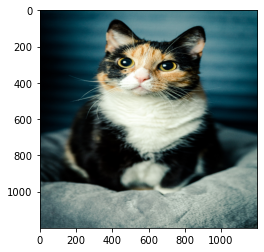

In [13]:
plt.imshow(img1);

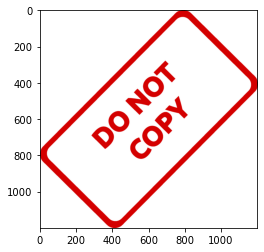

In [14]:
plt.imshow(img2);

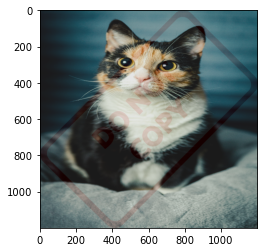

In [15]:
blended = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.1, gamma=0)
plt.imshow(blended);

In [16]:
# OVERLAY SMALL IMAGE ON TOP OF A LARGER IMAGE (NO BLENDING)
# Numpy Reassignment 

In [161]:
img1 = cv2.imread("img2.png")
img1 =cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("do-not-copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [162]:
img2 = cv2.resize(img2,(600,600))
img1 = cv2.resize(img1,(1200,1300))

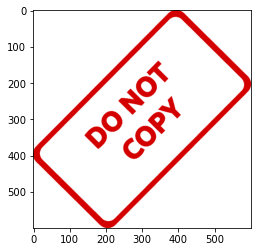

In [163]:
plt.imshow(img2);

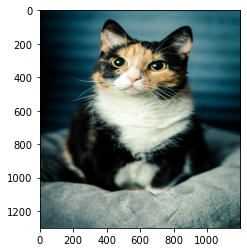

In [164]:
plt.imshow(img1);

In [165]:
large_img = img1
small_img = img2

In [166]:
x_offset = 0 
y_offset = 0

In [167]:
x_end = x_offset + small_img.shape[0]
y_end = y_offset + small_img.shape[1]

In [168]:
small_img.shape

(600, 600, 3)

In [169]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

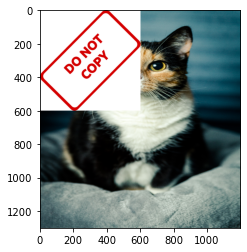

In [170]:
plt.imshow(large_img)

In [171]:
# BLEND TOGETHER IMAGES OF DIFFERENT SIZE 

In [204]:
img1 = cv2.imread("img2.png")
img1 =cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("do-not-copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [205]:
img2 = cv2.resize(img2,(600,600))
img1 = cv2.resize(img1,(1200,1300))

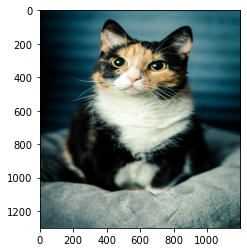

In [206]:
plt.imshow(img1);

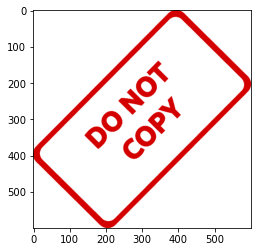

In [207]:
plt.imshow(img2);

In [208]:
img1.shape

(1300, 1200, 3)

In [209]:
img2.shape

(600, 600, 3)

In [255]:
x_offset = 1200 - 600
y_offset = 1300 - 600

In [256]:
rows, cols, channels = img2.shape

In [257]:
rows

600

In [258]:
cols

600

In [259]:
channels

3

In [260]:
roi = img1[y_offset:1300,x_offset:1200]

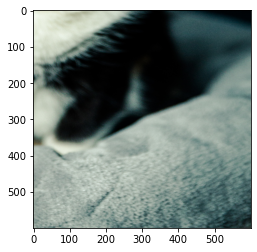

In [261]:
plt.imshow(roi)

In [262]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

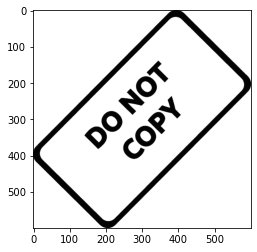

In [263]:
plt.imshow(img2gray, cmap="gray")

In [264]:
mask_inv=cv2.bitwise_not(img2gray)

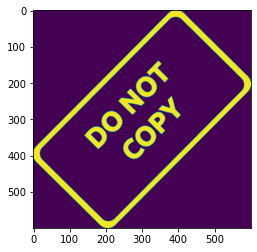

In [265]:
plt.imshow(mask_inv)

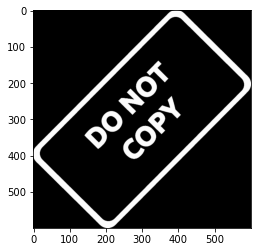

In [266]:
plt.imshow(mask_inv,cmap="gray")

In [267]:
mask_inv.shape

(600, 600)

In [268]:
import numpy as np
white_bg = np.full(img2.shape,255,dtype=np.uint8)

In [269]:
white_bg.shape

(600, 600, 3)

In [270]:
bk = cv2.bitwise_or(white_bg,white_bg,mask=mask_inv)

In [271]:
bk.shape

(600, 600, 3)

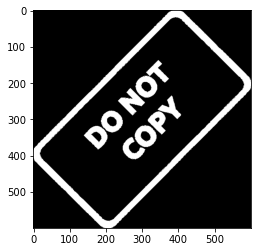

In [272]:
plt.imshow(bk)

In [273]:
fg = cv2.bitwise_or(img2,img2, mask=mask_inv)

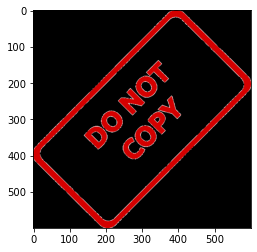

In [274]:
plt.imshow(fg)

In [275]:
final_roi = cv2.bitwise_or(roi,fg)

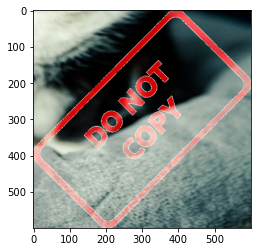

In [276]:
plt.imshow(final_roi)

In [277]:
large_img=img1
small_img=final_roi

In [278]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]]=small_img

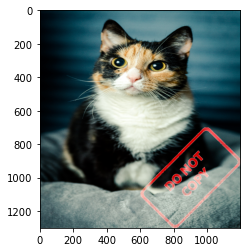

In [279]:
plt.imshow(large_img);